# **Soft Computing Lab Project**
# Yoga Pose Detection and Classification Using Deep Learning
Section - B_2
Group - 3: 170204093, 170204102, 170204106

# **Mount and Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/misbah4064/human-pose-estimation-opencv.git
%cd /content/drive/MyDrive/Colab Notebooks/CSE SoftComp/project

Cloning into 'human-pose-estimation-opencv'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/drive/MyDrive/Colab Notebooks/CSE SoftComp/project


In [ ]:
import cv2 as cv
import numpy as np
#from google.colab.patches import cv2_imshow
from os import listdir
from os.path import isfile, join
import time
# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score

# PyTorch libraries and modules
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

# **Pose Extraction using Open CV and OPENPOSE**

In [ ]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17 }

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("/content/drive/MyDrive/Colab Notebooks/CSE SoftComp/project/human-pose-estimation-opencv/graph_opt.pb")
thr = 0.2

def poseDetector(frame):
    video_data = []
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :18, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 18 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)
        video_data.append([x,y])
        
    return video_data

In [ ]:
mypath = '/content/drive/MyDrive/Colab Notebooks/CSE SoftComp/project/Yoga_Vid_Collected'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()
print(onlyfiles)

['Abhay_Bhuj.mp4', 'Abhay_Padam.mp4', 'Abhay_Shav.mp4', 'Abhay_Tada.mp4', 'Abhay_Trik.mp4', 'Abhay_Vriksh.mp4', 'Ameya_Bhuj.mp4', 'Ameya_Padam.mp4', 'Ameya_Shav.mp4', 'Ameya_Tada.mp4', 'Ameya_Trik.mp4', 'Ameya_Vriksh.mp4', 'Bhumi_Bhuj.mp4', 'Bhumi_Padam.mp4', 'Bhumi_Shav.mp4', 'Bhumi_Tada.mp4', 'Bhumi_Trik.mp4', 'Bhumi_Vriksh.mp4', 'Deepa_Bhuj.mp4', 'Deepa_Padam.mp4', 'Deepa_Shav.mp4', 'Deepa_Tada.mp4', 'Deepa_Trik.mp4', 'Deepa_Vriksh.mp4', 'Dristi_Bhuj.mp4', 'Dristi_Padam.mp4', 'Dristi_Shav.mp4', 'Dristi_Tada.mp4', 'Dristi_Trik.mp4', 'Dristi_Vriksh.mp4', 'Harshav_Bhuj.mp4', 'Harshav_Padam.mp4', 'Harshav_Shav.mp4', 'Harshav_Tada.mp4', 'Harshav_Trik.mp4', 'Harshav_Vriksh.mp4', 'Kaustuk_Bhuj.mp4', 'Kaustuk_Padam.mp4', 'Kaustuk_Shav.mp4', 'Kaustuk_Tada.mp4', 'Kaustuk_Trik.mp4', 'Kaustuk_Vriksh.mp4', 'Lakshmi_Bhuj.mp4', 'Lakshmi_Padam.mp4', 'Lakshmi_Shav.mp4', 'Lakshmi_Tada.mp4', 'Lakshmi_Vriksh.mp4', 'Piyush_Bhuj.mp4', 'Piyush_Padam.mp4', 'Piyush_Shav.mp4', 'Piyush_Tada.mp4', 'Piyush_Trik

In [ ]:
video_data_full=[]
i=1
for fname in onlyfiles:
  cap = cv.VideoCapture(mypath+'/'+fname)
  length = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
  m_length =int(length/3)
  first_time = time.time()
  print('filename: ',fname)
  
  j=0
  while j!= 45:
    ret, frame = cap.read(j+m_length)
    video_data_full.append(poseDetector(frame))
    j=j+1
  second_time = time.time()
  print('video done count: ',i,' calculation time: ',second_time-first_time)
  i= i+1


filename:  Abhay_Bhuj.mp4
video done count:  1  calculation time:  43.987730503082275
filename:  Abhay_Padam.mp4
video done count:  2  calculation time:  43.41202163696289
filename:  Abhay_Shav.mp4
video done count:  3  calculation time:  43.36003279685974
filename:  Abhay_Tada.mp4
video done count:  4  calculation time:  43.25227665901184
filename:  Abhay_Trik.mp4
video done count:  5  calculation time:  43.18644714355469
filename:  Abhay_Vriksh.mp4
video done count:  6  calculation time:  43.219974756240845
filename:  Ameya_Bhuj.mp4
video done count:  7  calculation time:  43.50560450553894
filename:  Ameya_Padam.mp4
video done count:  8  calculation time:  43.33621621131897
filename:  Ameya_Shav.mp4
video done count:  9  calculation time:  43.17948865890503
filename:  Ameya_Tada.mp4
video done count:  10  calculation time:  43.20096707344055
filename:  Ameya_Trik.mp4
video done count:  11  calculation time:  43.10838437080383
filename:  Ameya_Vriksh.mp4
video done count:  12  calcul

In [ ]:
x= np.array(video_data_full)

In [ ]:
x = x.reshape(88,45,18,2)

In [ ]:
np_save_path='/content/drive/MyDrive/Colab Notebooks/CSE SoftComp/project/'
#np.save(np_save_path+'_x_poses.npy',x)

In [ ]:
y=[]
for i, vid_name in enumerate(onlyfiles):
  if 'Bhuj'  in vid_name:
    y.append(0)
  elif 'Padam' in vid_name:
    y.append(1)
  elif 'Shav' in vid_name:
    y.append(2)
  elif 'Tada' in vid_name:
    y.append(3)
  elif 'Trik' in vid_name:
    y.append(4)
  elif 'Vriksh' in vid_name:
    y.append(5)

y= np.array(y)
y.shape

(88,)

In [ ]:
#np.save(np_save_path+'_y_poses.npy',y)

# **Data Load and Shape**

In [ ]:
_x = np.load(np_save_path+'_x_poses.npy')
_y = np.load(np_save_path+'_y_poses.npy')

In [ ]:
_x=_x.reshape(3960,18,2)
_x2=_x.reshape(3960,36)

In [ ]:
print(_x.shape,_x2.shape)

(3960, 18, 2) (3960, 1, 36)


In [ ]:
new_y=[]
for i in _y:
  for j in range(45):
    new_y.append(i)

_y= np.array(new_y)
_y.shape

In [ ]:
_x=_x/255
_x = _x.astype('float32')
_y= _y.astype('float32')

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(_x, _y, test_size = 0.2,random_state=93102106)
(train_x.shape, train_y.shape), (test_x.shape, test_y.shape)

(((3168, 18, 2), (3168,)), ((792, 18, 2), (792,)))

In [ ]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(_x2, _y, test_size = 0.2,random_state=93102106)
(train_x2.shape, train_y2.shape), (test_x2.shape, test_y2.shape)

(((3168, 36), (3168,)), ((792, 36), (792,)))

# **SVM**

In [ ]:
#Create a svm Classifier
model = svm.SVC(gamma = 0.001,C = 1000, kernel='rbf') 

#Train the model using the training sets
model.fit(train_x2, train_y2)

#Predict the response for test dataset
y_pred1 = model.predict(train_x2)

print("Training Accuracy:",accuracy_score(train_y2, y_pred1))

y_pred2 = model.predict(test_x2)

print("Testing Accuracy:",accuracy_score(test_y2, y_pred2))

Training Accuracy: 0.9981060606060606
Testing Accuracy: 0.7297979797979798


# **CNN**

In [ ]:
# converting training images into torch format
train_x = train_x.reshape(train_x.shape[0], 1, 18, 2)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

# shape of training data
print(train_x.shape, train_y.shape)

# converting validation images into torch format
test_x = test_x.reshape(test_x.shape[0], 1, 18, 2)
test_x  = torch.from_numpy(test_x)

# converting the target into torch format
test_y = test_y.astype(int);
test_y = torch.from_numpy(test_y)

# shape of validation data
print(test_x.shape, test_y.shape)

torch.Size([3168, 1, 18, 2]) torch.Size([3168])
torch.Size([792, 1, 18, 2]) torch.Size([792])


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2d(1,128, kernel_size=2, stride=1, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

        self.linear_1 = nn.Linear(1152, 300)
        self.linear_2 = nn.Linear(300, 6)

    def forward(self, x):
        x = self.conv_1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.maxpool(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        
        x = self.linear_1(x)
        x = self.dropout(x)
        x = self.relu(x)

        x = self.linear_2(x)

        
        return x

In [ ]:
# defining the model
model = Net()
# defining the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# defining the loss function
criterion = CrossEntropyLoss()
    
print(model)

Net(
  (conv_1): Conv2d(1, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (linear_1): Linear(in_features=1152, out_features=300, bias=True)
  (linear_2): Linear(in_features=300, out_features=6, bias=True)
)


In [ ]:
def train(epoch):
    model.train()
    tr_loss = 0
    
    batch_train_losses = []
    
        
    batch_size = 10
    batch_x_train = torch.tensor_split(train_x, batch_size)
    batch_y_train = torch.tensor_split(train_y, batch_size)
    
    for i in range(len(batch_x_train)):
        
        x_train = batch_x_train[i]
        y_train = batch_y_train[i]

        optimizer.zero_grad()
        
        output_train = model(x_train)
        
        batch_train_loss = criterion(output_train, y_train)
    
        batch_train_losses.append(batch_train_loss.item())
        
        batch_train_loss.backward()
        optimizer.step()
        
    temp=sum(batch_train_losses)/len(batch_train_losses)
    train_losses.append(temp)
    if epoch%10 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'train loss :', temp)
        

In [ ]:
def test(epoch):
    model.eval()
    batch_test_losses = []
    
    batch_size = 10
    batch_x_test = torch.tensor_split(test_x, batch_size)
    batch_y_test = torch.tensor_split(test_y, batch_size)
    
    for i in range(len(batch_x_test)):

        x_test = batch_x_test[i]
        y_test = batch_y_test[i]
        
        output_val = model(x_test)
    
        batch_test_loss = criterion(output_val, y_test)
    
        batch_test_losses.append(batch_test_loss.item())
        
    temp2=sum(batch_test_losses)/len(batch_test_losses)
    val_losses.append(temp2)

    if epoch%10 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'test loss :', temp2)

In [ ]:
train_losses = []
val_losses = []
# defining the number of epochs
n_epochs = 101
# training the model
for epoch in range(n_epochs):
    train(epoch)
    test(epoch)

Epoch :  1 	 train loss : 6.6075396060943605
Epoch :  1 	 test loss : 2.006033730506897
Epoch :  11 	 train loss : 0.9965717852115631
Epoch :  11 	 test loss : 0.9572088301181794
Epoch :  21 	 train loss : 0.8698902308940888
Epoch :  21 	 test loss : 0.8229982256889343
Epoch :  31 	 train loss : 0.772116756439209
Epoch :  31 	 test loss : 0.7362954795360566
Epoch :  41 	 train loss : 0.6479282081127167
Epoch :  41 	 test loss : 0.5989469826221466
Epoch :  51 	 train loss : 0.57249156832695
Epoch :  51 	 test loss : 0.5407848119735718
Epoch :  61 	 train loss : 0.5138066917657852
Epoch :  61 	 test loss : 0.48204866647720335
Epoch :  71 	 train loss : 0.503140464425087
Epoch :  71 	 test loss : 0.5044659733772278
Epoch :  81 	 train loss : 0.46692822575569154
Epoch :  81 	 test loss : 0.41804988980293273
Epoch :  91 	 train loss : 0.46447243690490725
Epoch :  91 	 test loss : 0.4499367833137512
Epoch :  101 	 train loss : 0.4434872031211853
Epoch :  101 	 test loss : 0.4575696915388107


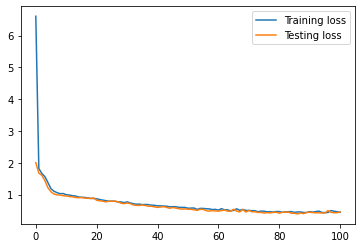

In [ ]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Testing loss')
plt.legend()
#plt.savefig(model_path+'cnn_loss_vs_itr.png', dpi=100)
plt.show()

In [ ]:
def calc_accuracy(mdl, X, Y) -> float:
    
    y_logits = mdl(X)
    max_scores, max_idx_class = mdl(X).max(dim=1)
    n = X.size(0)
    assert( n == max_idx_class.size(0))
    acc = (max_idx_class == Y).sum().item() / n
    return acc

In [ ]:
print('training accuracy',calc_accuracy(model,train_x,train_y))
print('testing accuracy',calc_accuracy(model,test_x,test_y))

training accuracy 0.9201388888888888
testing accuracy 0.8901515151515151


# **CNN + LSTM**

In [ ]:
class Combine(nn.Module):
    def __init__(self):
        super(Combine, self).__init__()
        self.conv_1 = nn.Conv2d(1,128, kernel_size=2, stride=1, padding=1)
        self.linear = nn.Linear(64,10)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.log_softmax =nn.LogSoftmax()

        self.rnn = nn.LSTM(
            input_size=1152, 
            hidden_size=64, 
            num_layers=20,
            bias =0.5,
            batch_first=True)
        
        
        


    def forward(self, x):
        x = self.conv_1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.maxpool(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.rnn(x)
        return self.log_softmax(x, dim=1)


In [ ]:
model2 = Combine()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.05)
# defining the loss function
criterion = CrossEntropyLoss()
    
print(model2)

Combine(
  (conv_1): Conv2d(1, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (linear): Linear(in_features=64, out_features=10, bias=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (softmax): Softmax(dim=1)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (log_softmax): LogSoftmax(dim=None)
  (rnn): LSTM(1152, 64, num_layers=20, bias=0.5, batch_first=True)
)
